## Using Statistics In Marketing Analytics
#### By Kevin Eddy
For this project I'm using the dataset found in the following link: https://docs.google.com/spreadsheets/d/111Qu0KWR5ILzmmB2TVZTwesUI-zkNW7m/edit#gid=1497916650

In today's competitive advertising landscape, it is essential to regularly analyze campaign data to gain insights into the performance of different marketing strategies. This project aims to perform a comprehensive analysis of Meta and AdWords campaign data from 2019 to identify trends, craft and test hypotheses, and provide recommendations for improving future campaigns.

The analysis will involve the following steps:

 - Exploratory Data Analysis (EDA): Perform EDA to gain insights into the overall performance of the campaigns, such as impressions, clicks, conversions, and cost per conversion. Identify any significant trends or patterns in the data.
 - Hypothesis Testing: Formulate hypotheses based on the observations from EDA and test them using statistical methods. This will help to determine the impact of different campaign variables on performance.
 - Insight Generation: Interpret the results of the hypothesis tests and other analyses to generate actionable insights for improving future campaigns.
 - Recommendations: Develop recommendations for improving the next round of campaigns based on the insights gained from the analysis. This may include suggestions for optimizing ad copy, targeting, bidding strategies, and landing pages.
 
The project will provide valuable insights into the effectiveness of the Meta and AdWords campaigns conducted in 2019. The findings will help to improve the efficiency of future campaigns, leading to increased conversions and a higher return on investment (ROI). The recommendations provided in the project will be actionable and tailored to the specific needs of the business.

To make this analysis a bit easier follow, I have broken it into 4 parts:
 - Getting to Know the Data
 - Understanding Your Data Samples
 - Testing Your Hypothesis
 - Choosing and Executing a Model
 - Findings and Recommendation 

In [180]:
## Import Libraries 
import numpy as np                            ## adds powerful data structures to python to perform mathematical operations on arrays.
import pandas as pd                           ## library perform general eda.
import seaborn as sns                         ## data visualization library based on matplotlib to provide statistical graphs. 
from matplotlib import pyplot as plt          ## creates quality static, animated, and visualizations in python.
import plotly.express as px
import scipy
from scipy import stats
from scipy.stats import iqr
from scipy.stats import norm
from scipy.stats import kstest

In [181]:
# load fiscal_calendar table
df = pd.read_csv("/Users/kevineddy/Desktop/Data Projects/Marketing Analysis/Capstone 1.xlsx - Capstone Dataset.csv")


Before we begin, print a sample of the dataframe to make sure we imported it correctly

In [182]:
df.sample(10)

,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),AdWords Ad Campaign,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),AdWords Cost per Click (Ad Cost / Clicks)
320,11/17/2019,FB_Nov19,1956,51,11,$80,2.59%,21.97%,$1.59,AW_Nov19,3837,79,8,$126,2.06%,10.06%,$1.59
49,2/19/2019,FB_Feb19,1531,48,11,$67,3.11%,22.10%,$1.41,AW_Feb19,5499,62,4,$155,1.12%,6.62%,$2.52
16,1/17/2019,FB_Jan19,2903,28,10,$102,0.97%,34.13%,$3.61,AW_Jan19,5147,52,5,$130,1.02%,8.82%,$2.49
333,11/30/2019,FB_Nov19,2114,56,13,$71,2.67%,23.55%,$1.26,AW_Nov19,4983,68,5,$103,1.36%,7.96%,$1.52
283,10/11/2019,FB_Oct19,1656,28,8,$106,1.67%,27.22%,$3.83,AW_Oct19,4758,43,6,$99,0.90%,14.31%,$2.31
133,5/14/2019,FB_May19,1467,54,12,$79,3.67%,21.86%,$1.46,AW_May19,4117,38,6,$182,0.93%,15.48%,$4.77
85,3/27/2019,FB_Mar19,1292,36,9,$140,2.82%,25.49%,$3.84,AW_Mar19,4192,74,7,$109,1.78%,9.03%,$1.47
265,9/23/2019,FB_Sep19,2024,34,8,$113,1.67%,22.96%,$3.36,AW_Sep19,4264,78,6,$191,1.83%,7.56%,$2.45
47,2/17/2019,FB_Feb19,2839,31,10,$113,1.10%,32.86%,$3.62,AW_Feb19,3863,36,7,$172,0.94%,18.81%,$4.75
70,3/12/2019,FB_Mar19,1314,43,10,$105,3.29%,22.31%,$2.44,AW_Mar19,4024,65,7,$99,1.60%,11.20%,$1.54


## Getting to Know the Data
Let's get started with becoming familiar with the data.

### Measures of Central Tendency
The Meausers of Central Tendency include the mean, median, and mode. These measures help us identify the middle of the data which gives us a quick understanding of the audience and how well the campaigns performed.

#### Facebook

In [33]:
# return summary statistics for the data
df.describe()

,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions
count,365.000000,365.000000,365.000000,365.00000,365.000000,365.000000
mean,2179.687671,44.049315,11.742466,4717.19726,60.383562,5.980822
std,618.074639,12.140559,2.924786,561.11406,14.368225,1.628106
min,1050.000000,15.000000,5.000000,3714.00000,31.000000,3.000000
25%,1656.000000,35.000000,10.000000,4247.00000,49.000000,5.000000
50%,2202.000000,43.000000,12.000000,4711.00000,60.000000,6.000000
75%,2717.000000,54.000000,13.000000,5190.00000,73.000000,7.000000
max,3320.000000,73.000000,19.000000,5760.00000,89.000000,9.000000


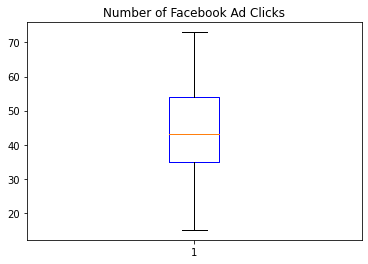

In [34]:
# FB Clicks
plt.boxplot(df['Facebook Ad Clicks'], boxprops=dict(color='blue'))
plt.title('Number of Facebook Ad Clicks');

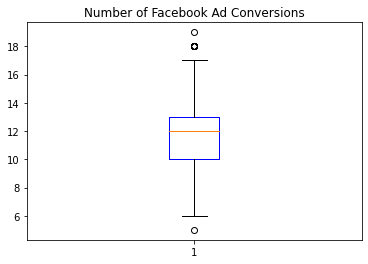

In [35]:
# FB Conversions
plt.boxplot(df['Facebook Ad Conversions'], boxprops=dict(color='blue'))
plt.title('Number of Facebook Ad Conversions');

The box plot for Clicks looks good with a normal distribution. However, the box plot for Conversions shows there are some outliers in the data. Median may be a better representation of the average number conversions.

In [36]:
# the describe function doesn't include median and mode so we'll add them here
# create a dictionary to store the median and mode
centralTendency = {}
centralTendency['Conversions Median'] = df['Facebook Ad Conversions']. median()
centralTendency['Conversion Mode'] = df['Facebook Ad Conversions'].mode()[0]
centralTendency['Clicks Median'] = df['Facebook Ad Clicks']. median()
centralTendency['Clicks Mode'] = df['Facebook Ad Clicks'].mode()[0]

centralTendency

{'Conversions Median': 12.0,
 'Conversion Mode': 13,
 'Clicks Median': 43.0,
 'Clicks Mode': 36}

#### Clicks
 - Mean: 44.04
 - Median: 43.00
 - Mode: 36.00
 - Std.Dev: 12.14
 - Range: 58.00
 
The Std. Deviation is a little high, showing that the data is spread out over a larger range of values and two-thirds of the campaigns received between 32 and 56 clicks.

#### Conversions
 - Mean: 11.74
 - Median: 12
 - Mode: 13
 - Std.Dev: 2.92
 - Range: 14.00
 
The Std. Deviation for conversions is more reasonable, showing that two-thirds of the campaigns received between 9 and 15 conversion.
 
#### Adwords

Text(0.5, 1.0, 'Number of Adwords Ad Clicks')

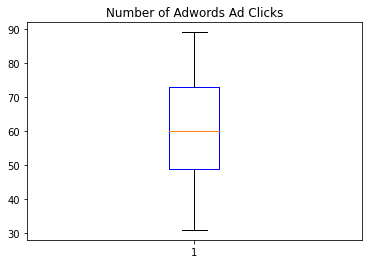

In [76]:
# Adwords Clicks
plt.boxplot(df['AdWords Ad Clicks'], boxprops=dict(color='blue'))
plt.title('Number of Adwords Ad Clicks')

Text(0.5, 1.0, 'Number of Adwords Ad Conversions')

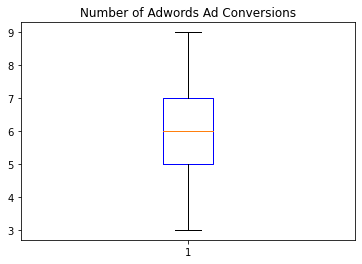

In [75]:
# Adwords Conversions
plt.boxplot(df['AdWords Ad Conversions'], boxprops=dict(color='blue'))
plt.title('Number of Adwords Ad Conversions')

Both box plots look good and don't show any outliers. 

In [40]:
# the describe function doesn't include median and mode so we'll add them here
# create a dictionary to store the median and mode
centralTendency = {}
centralTendency['Conversions Median'] = df['AdWords Ad Conversions']. median()
centralTendency['Conversion Mode'] = df['AdWords Ad Conversions'].mode()[0]
centralTendency['Clicks Median'] = df['AdWords Ad Clicks']. median()
centralTendency['Clicks Mode'] = df['AdWords Ad Clicks'].mode()[0]

centralTendency

{'Conversions Median': 6.0,
 'Conversion Mode': 5,
 'Clicks Median': 60.0,
 'Clicks Mode': 78}

#### Clicks
 - Mean: 60.4
 - Median: 60.0
 - Mode: 78
 - Std.Dev: 14.4
 - Range: 58

Similar to the Facebook clicks, the std. dev for Adwords clicks is a pretty high too. Two-thirds of the campaigns received between 46 and 74 clicks. 

#### Conversions
 - Mean: 6.0
 - Median: 6.0
 - Mode: 5
 - Std.Dev: 1.6
 - Range: 6
 
While two-thirds of campaigns in Adwords recieved roughly between 4 and 8 conversions, which is more reasonable.
 

## Frequency Table

In [66]:
# Create a Frequency Table For FB Conversions
# Group number of Occurances together
# Define ranges 
ranges = [1,6,11,16, float('inf')] 
labels = ['1-5', '6-10', '11-15', '16+']
#Create a pandas series 
series = pd.Series(df['Facebook Ad Conversions'])
# Group values based on ranges and compute frequency table
frequency_table = pd.cut(series, bins=ranges, labels=labels, include_lowest=True).value_counts().sort_index()
frequency_table



1-5        8
6-10     167
11-15    165
16+       25
Name: Facebook Ad Conversions, dtype: int64

In [104]:
#calculate correlation coefficient between FB conversions and FB clicks
#r = scipy.stats.pearsonr(x='Facebook Ad Clicks', y= 'Facebook Ad Conversions')[0]
#pearsonr returning error "ValueError: x and y must have the same length" - df is same length, need to look into this

from numpy import cov
covariance = cov(df['Facebook Ad Clicks'], df['Facebook Ad Conversions'])
r = covariance/(np.std(df['Facebook Ad Clicks'])* np.std(df['Facebook Ad Conversions']))
r

array([[4.16232571, 0.8761755 ],
       [0.8761755 , 0.24157217]])

The correlation coefficient is 0.88 which indicates that Facebook Cliks and Conversions have a strong positive correlation.

The scatter plot (below) and the positive correlation coefficient suggest that there is a positive correlation between clicks and conversions for Facebook Ads. This means that as the number of clicks on an ad increases, the number of conversions is also likely to increase.

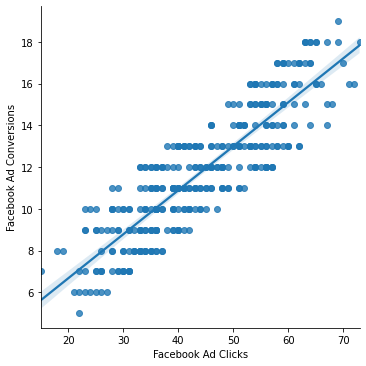

In [90]:
# Create a scatter plot showing the correlation between FB clicks and FB conversions
graph = sns.lmplot(x='Facebook Ad Clicks', y= 'Facebook Ad Conversions', data= df)

In [56]:
# Create a Frequency Table For Adwords Conversions
# Group number of Occurances together
# Define ranges 
ranges = [1,3,5,7, float('inf')] 
labels = ['1-2', '3-4', '5-6', '7+']
#Create a pandas series 
series = pd.Series(df['AdWords Ad Conversions'])
# Group values based on ranges and compute frequency table
frequency_table = pd.cut(series, bins=ranges, labels=labels, include_lowest=True).value_counts().sort_index()
frequency_table

1-2     22
3-4    134
5-6    137
7+      72
Name: AdWords Ad Conversions, dtype: int64

In [106]:
#calculate correlation coefficient between Adwords conversions and Adwords clicks
covariance = cov(df['AdWords Ad Clicks'], df['AdWords Ad Conversions'])
r = covariance/(np.std(df['AdWords Ad Clicks'])* np.std(df['AdWords Ad Conversions']))
r

array([[8.84935953, 0.44922395],
       [0.44922395, 0.11362427]])

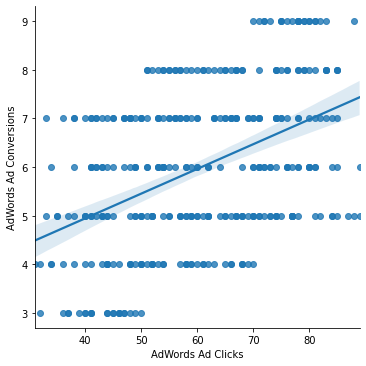

In [108]:
# Create a scatter plot showing the correlation between Adwords clicks and Adwords conversions
graph = sns.lmplot(x='AdWords Ad Clicks', y= 'AdWords Ad Conversions', data= df)

The correlation coefficient for Adwords clicks and conversions is 0.45, which is a moderate to low correlation. This means that while there is a relationship between the two variables, it's not a strong one.

However, the scatter plot is definitely not showing much of a correlation.

## Summary

## Understanding Your Data
### Distribution and Variables
Types of variables: 
* Facebook Ad Views: **Quantitative Independent Discrete**
* Facebook Ad Clicks: **Quantitative Independent Discrete**
* Cost per Facebook Ad: **Quantitative Dependent Continuous**
* Facebook Click-Through Rate: **Quantitative Independent Continous**
* Facebook Conversion Rate: **Quantitative Independent Continous**
* Facebook Cost per Click: **Quantitative Independent Continous**
<br>
<br>
* AdWords Ad Views: **Quantitative Independent Discrete**
* AdWords Ad Clicks: **Quantitative Independent Discrete**
* Cost per AdWords Ad: **Quantitative Dependent Continuous**
* AdWords Click-Through Rate: **Quantitative Independent Continous**
* AdWords Conversion Rate: **Quantitative Independent Continous**
* AdWords Cost per Click: **Quantitative Independent Continous**


**What does the correlation coefficient and scatter plot tell you about the relationship between clicks and conversions for the AdWords Ad and Facebook Ads?**

Based on the correlation coefficient, we can see that there is a stronger correlation between clicks and conversions on Facebook than on Google. This suggests that Facebook might be a better place to run ads if our goal is to generate conversions.

## Understanding Your Data Samples

#### Facebook

array([[<Axes: title={'center': 'Facebook Ad Clicks'}>]], dtype=object)

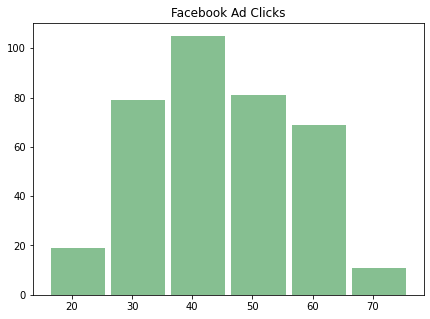

In [112]:
# Create a histogram to see the distribution of Clicks with bucket size of 10
df.hist(column='Facebook Ad Clicks', bins=[16,26,36,46,56,66,76], grid=False, figsize=(7,5), color='#86bf91', zorder=2, rwidth=0.9)

array([[<Axes: title={'center': 'Facebook Ad Conversions'}>]],
      dtype=object)

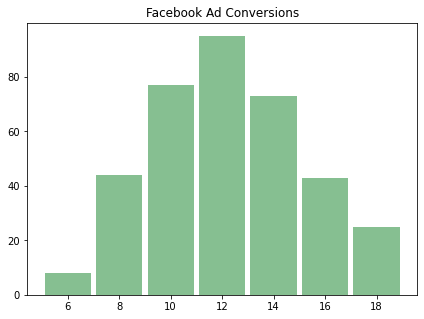

In [113]:
# Create a histogram to see the distribution of Conversions with bucket size of 2
df.hist(column='Facebook Ad Conversions', bins=[5,7,9,11,13,15,17,19], grid=False, figsize=(7,5), color='#86bf91', zorder=2, rwidth=0.9)

From looking at the above histograms above for Facebook clicks and conversions we can conclude that the data is normally distributed 

#### AdWords

array([[<Axes: title={'center': 'AdWords Ad Clicks'}>]], dtype=object)

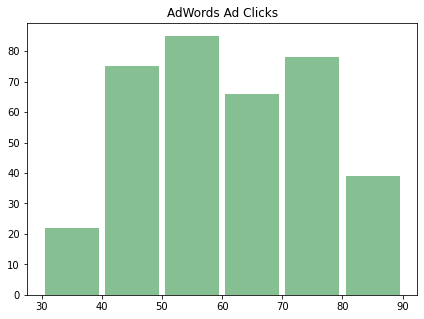

In [126]:
# Create a histogram to see the distribution of Clicks with bucket size of 10
df.hist(column='AdWords Ad Clicks', bins=[30,40,50,60,70,80,90], grid=False, figsize=(7,5), color='#86bf91', zorder=2, rwidth=0.9)

array([[<Axes: title={'center': 'AdWords Ad Conversions'}>]], dtype=object)

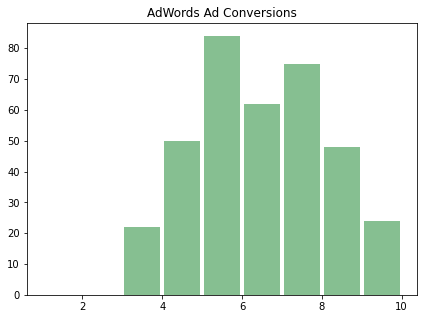

In [132]:
# Create a histogram to see the distribution of Conversions with bucket size of 1
df.hist(column='AdWords Ad Conversions', bins=[1,2,3,4,5,6,7,8,9,10], grid=False, figsize=(7,5), color='#86bf91', zorder=2, rwidth=0.9)

<Axes: xlabel='AdWords Ad Conversions', ylabel='Count'>

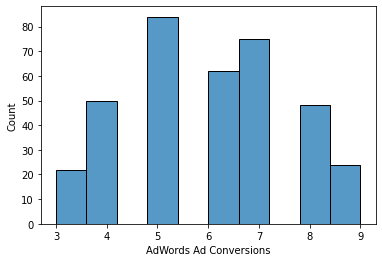

In [146]:
#Confirming that our histogram for Adwords conversions has the correct distribution 
#Sturge’s rule
bin_count = int(np.ceil(np.log2(len(df['AdWords Ad Conversions']))) + 1)
sns.histplot(x=df['AdWords Ad Conversions'],bins=bin_count)

<Axes: xlabel='AdWords Ad Conversions', ylabel='Count'>

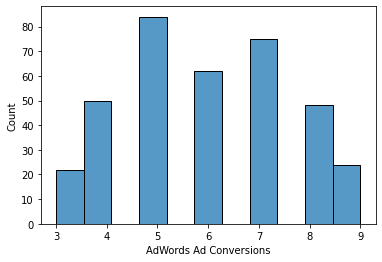

In [147]:
#Freedman-Diaconis rule
q1 = df['AdWords Ad Conversions'].quantile(0.25)
q3 = df['AdWords Ad Conversions'].quantile(0.75)
iqr = q3 - q1
bin_width = (2 * iqr) / (len(df['AdWords Ad Conversions']) ** (1 / 3))
bin_count = int(np.ceil((df['AdWords Ad Conversions'].max() - df['AdWords Ad Conversions'].min()) / bin_width))
sns.histplot(x=df['AdWords Ad Conversions'],bins=bin_count)

After setting up our histograms for Adwords clicks and conversions and confirming the conversions distribution with the Surge's rule and Freedman-Diaconis rule we can conclude that the data is normally distributed.

## Testing Your Hypothesis

### Hypothesis Testing

* **Evaluation Question:** Is there a difference in the number of Conversions on Facebook vs Adwords?

* **Hypothesis:**
Three Parts of a Clear Hypothesis:

    * What will change?

    * How will it change?

    * What will cause the change?

**Our cost per conversion will be lower if we advertise on Facebook rather than on Adwords.**
<br>

    H0: There is no difference in cost per conversion between Facebook and Adwords.
    H1: There is a difference in cost per conversion between Facebook and Adwords.

* **Required Variables:**

* **Choosing a Measurement Approach:**

* **Selecting an Analysis:**

In [133]:
# Find the Mean for Facebook Ad Conversions and Adword Ad Conversions
conversion_means = {}
conversion_means['Facebook Conversion Mean'] = df['Facebook Ad Conversions']. mean()
conversion_means['AdWords Conversions Mean'] = df['AdWords Ad Conversions']. mean()
conversion_means

{'Facebook Conversion Mean': 11.742465753424657,
 'AdWords Conversions Mean': 5.980821917808219}

In [183]:
# Find the variance on FB Conversions and Adwords Conversions
# data_group1: FB Ads Conversions
# data_group2: Adwords Ads Conversions
#equal_var = 'True': The standard idependent two sample t-test will be conducted by taking into consideration the equal pop variances.
#equal_var = 'False': The Welch's t-test will be conducted by not taking into consideration the equal pop variances.

data_group1 = df['Facebook Ad Conversions']
data_group2 = df['AdWords Ad Conversions']

print('Facebook Ad Conversion variance: ' + str(np.var(data_group1)),'AdWords Ad Conversion variance: ' + str(np.var(data_group2)))

Facebook Ad Conversion variance: 8.530936385813469 AdWords Ad Conversion variance: 2.6434678176018127


In [156]:
# Perform a T-Test 
stats.ttest_ind(a=data_group1, b=data_group2, equal_var=True)

Ttest_indResult(statistic=32.88402060758184, pvalue=4.559680828599345e-146)

## Summary

Is there a difference between the number of conversions on the Facebook platform versus the AdWords platform?

Yes, there is a difference between the number of conversions on Facebook and AdWords.

**The T-stat indicates that there is a very large difference between the means of the two groups. Our p-value is also below 0.05 which means we can reject our null hypothesis and accept our alternative hypothesis, that there is a difference in cost per conversion between Facebook and Adwords.**


## Choosing/Building a Model

**How many Facebook ad conversions can I expect given a certain number of Facebook ad clicks?**

Im choosing to use a Simple Linear Regression model because the relationship between the number of Facebook ad clicks and the number of Facebook ad conversions is linear, as we saw above. And because simple linear regression can be used to make predictions about the dependent variable even when there is a limited amount of data. This data set only contains 365 rows of data which is quite a bit less than the needed sample size required to use a time-series model. (roughly 700 days worth of data)

For our simple linear regression coversions will be the dependent variable and clicks with be our independent variable

In [251]:
#Assigning X and Y values
x = np.array(df['Facebook Ad Clicks'])
y = np.array(df['Facebook Ad Conversions'])

# Reshape the arrays into 2D arrays with 1 column
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

print(x)

[[18]
 [36]
 [26]
 [27]
 [15]
 [37]
 [49]
 [49]
 [36]
 [41]
 [51]
 [56]
 [48]
 [42]
 [56]
 [31]
 [28]
 [40]
 [30]
 [50]
 [33]
 [46]
 [28]
 [43]
 [52]
 [24]
 [45]
 [55]
 [43]
 [28]
 [31]
 [25]
 [26]
 [25]
 [56]
 [41]
 [34]
 [31]
 [41]
 [41]
 [35]
 [29]
 [54]
 [40]
 [31]
 [42]
 [26]
 [31]
 [31]
 [48]
 [34]
 [32]
 [48]
 [28]
 [51]
 [44]
 [35]
 [55]
 [54]
 [46]
 [57]
 [28]
 [40]
 [43]
 [51]
 [44]
 [24]
 [29]
 [22]
 [59]
 [43]
 [61]
 [54]
 [39]
 [33]
 [32]
 [59]
 [28]
 [37]
 [48]
 [35]
 [36]
 [54]
 [41]
 [40]
 [36]
 [39]
 [25]
 [41]
 [42]
 [30]
 [39]
 [34]
 [52]
 [53]
 [35]
 [44]
 [26]
 [40]
 [57]
 [36]
 [22]
 [43]
 [57]
 [39]
 [36]
 [58]
 [36]
 [33]
 [43]
 [62]
 [45]
 [51]
 [19]
 [39]
 [59]
 [53]
 [36]
 [31]
 [21]
 [52]
 [54]
 [35]
 [48]
 [53]
 [25]
 [25]
 [58]
 [41]
 [47]
 [34]
 [42]
 [33]
 [54]
 [44]
 [50]
 [59]
 [23]
 [59]
 [36]
 [42]
 [29]
 [26]
 [23]
 [48]
 [46]
 [37]
 [36]
 [37]
 [41]
 [23]
 [40]
 [35]
 [61]
 [36]
 [48]
 [22]
 [46]
 [56]
 [35]
 [29]
 [44]
 [40]
 [50]
 [31]
 [33]
 [39

In [252]:
print(y)

[[ 8]
 [12]
 [ 8]
 [ 9]
 [ 7]
 [10]
 [15]
 [12]
 [12]
 [13]
 [14]
 [14]
 [12]
 [11]
 [12]
 [ 7]
 [10]
 [13]
 [ 8]
 [13]
 [ 8]
 [12]
 [10]
 [12]
 [13]
 [ 6]
 [11]
 [13]
 [11]
 [11]
 [ 7]
 [ 9]
 [ 7]
 [10]
 [13]
 [11]
 [ 9]
 [10]
 [13]
 [13]
 [12]
 [ 9]
 [16]
 [10]
 [ 8]
 [10]
 [ 7]
 [10]
 [ 9]
 [11]
 [11]
 [ 8]
 [11]
 [ 7]
 [14]
 [11]
 [12]
 [15]
 [12]
 [12]
 [15]
 [ 8]
 [11]
 [13]
 [14]
 [13]
 [10]
 [ 9]
 [ 5]
 [15]
 [10]
 [17]
 [15]
 [ 9]
 [ 8]
 [ 9]
 [17]
 [10]
 [12]
 [11]
 [11]
 [11]
 [12]
 [10]
 [13]
 [ 9]
 [10]
 [ 6]
 [11]
 [11]
 [ 7]
 [10]
 [12]
 [14]
 [13]
 [ 9]
 [10]
 [ 6]
 [ 9]
 [16]
 [10]
 [ 6]
 [13]
 [12]
 [13]
 [10]
 [16]
 [10]
 [12]
 [12]
 [16]
 [10]
 [14]
 [ 8]
 [11]
 [15]
 [16]
 [11]
 [ 7]
 [ 6]
 [11]
 [15]
 [ 8]
 [12]
 [16]
 [ 7]
 [ 7]
 [17]
 [ 9]
 [13]
 [10]
 [13]
 [ 9]
 [12]
 [12]
 [15]
 [17]
 [ 9]
 [13]
 [10]
 [10]
 [ 7]
 [ 7]
 [ 6]
 [13]
 [14]
 [12]
 [ 9]
 [ 8]
 [11]
 [ 9]
 [13]
 [11]
 [16]
 [ 9]
 [13]
 [ 7]
 [14]
 [15]
 [ 8]
 [11]
 [10]
 [13]
 [13]
 [ 9]
 [ 9]
 [11

In [253]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=80)
x_train

array([[59],
       [29],
       [54],
       [57],
       [34],
       [62],
       [34],
       [54],
       [54],
       [50],
       [32],
       [24],
       [73],
       [45],
       [37],
       [42],
       [39],
       [39],
       [28],
       [26],
       [39],
       [46],
       [40],
       [48],
       [31],
       [56],
       [37],
       [56],
       [61],
       [38],
       [56],
       [34],
       [57],
       [51],
       [42],
       [35],
       [49],
       [59],
       [41],
       [46],
       [46],
       [23],
       [54],
       [33],
       [61],
       [36],
       [44],
       [37],
       [62],
       [31],
       [40],
       [21],
       [36],
       [34],
       [59],
       [39],
       [52],
       [55],
       [43],
       [36],
       [37],
       [27],
       [40],
       [41],
       [51],
       [34],
       [40],
       [61],
       [48],
       [46],
       [22],
       [36],
       [45],
       [28],
       [56],
       [33],
       [58],

In [254]:
y_train

array([[17],
       [11],
       [14],
       [14],
       [ 9],
       [16],
       [10],
       [12],
       [16],
       [13],
       [ 8],
       [ 6],
       [18],
       [12],
       [10],
       [11],
       [10],
       [13],
       [10],
       [ 6],
       [ 9],
       [12],
       [11],
       [12],
       [ 8],
       [15],
       [11],
       [12],
       [14],
       [13],
       [12],
       [ 9],
       [12],
       [14],
       [13],
       [ 9],
       [15],
       [16],
       [13],
       [14],
       [14],
       [10],
       [12],
       [ 8],
       [16],
       [10],
       [13],
       [ 8],
       [17],
       [ 9],
       [ 9],
       [ 6],
       [ 9],
       [12],
       [17],
       [12],
       [13],
       [12],
       [11],
       [ 9],
       [12],
       [ 6],
       [11],
       [11],
       [13],
       [10],
       [13],
       [15],
       [13],
       [14],
       [ 7],
       [10],
       [11],
       [11],
       [12],
       [ 8],
       [16],

In [255]:
print(x_test)
print(y_test)

[[29]
 [42]
 [41]
 [37]
 [58]
 [34]
 [56]
 [65]
 [40]
 [53]
 [48]
 [62]
 [33]
 [47]
 [50]
 [55]
 [28]
 [41]
 [69]
 [28]
 [43]
 [57]
 [54]
 [39]
 [36]
 [44]
 [29]
 [56]
 [41]
 [31]
 [28]
 [43]
 [28]
 [46]
 [53]
 [33]
 [67]
 [30]
 [31]
 [37]
 [40]
 [31]
 [59]
 [58]
 [46]
 [49]
 [41]
 [35]
 [42]
 [59]
 [54]
 [45]
 [23]
 [53]
 [33]
 [46]
 [28]
 [36]
 [31]
 [39]
 [67]
 [52]
 [41]
 [36]
 [55]
 [40]
 [36]
 [55]
 [56]
 [57]
 [55]
 [47]
 [43]]
[[10]
 [11]
 [11]
 [12]
 [14]
 [ 8]
 [13]
 [16]
 [ 9]
 [16]
 [12]
 [17]
 [ 9]
 [10]
 [15]
 [13]
 [ 7]
 [ 9]
 [18]
 [ 8]
 [12]
 [15]
 [12]
 [11]
 [10]
 [10]
 [ 9]
 [12]
 [13]
 [ 7]
 [ 8]
 [12]
 [10]
 [12]
 [12]
 [ 8]
 [15]
 [ 8]
 [ 7]
 [10]
 [13]
 [ 7]
 [14]
 [13]
 [11]
 [12]
 [11]
 [ 8]
 [10]
 [15]
 [15]
 [12]
 [ 7]
 [13]
 [ 9]
 [13]
 [10]
 [11]
 [10]
 [11]
 [18]
 [14]
 [10]
 [12]
 [15]
 [12]
 [11]
 [13]
 [15]
 [12]
 [15]
 [12]
 [10]]


In [256]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [257]:
#Predict y from linear regression model
y_pred = lr.predict(x_test)

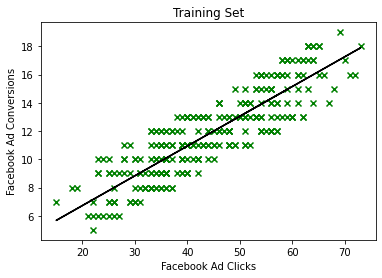

In [262]:
#scatter plot for Training set
plt.scatter(x_train,y_train,color='green', marker='x')
plt.plot(x_train,lr.predict(x_train),color='black')
plt.title('Training Set')
plt.xlabel('Facebook Ad Clicks')
plt.ylabel('Facebook Ad Conversions')
plt.show()

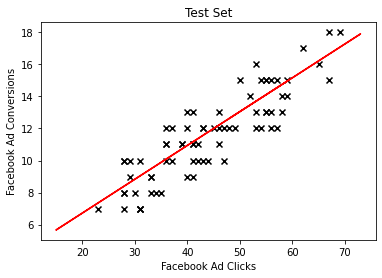

In [263]:
#scatter plot for Test set
plt.scatter(x_test,y_test,color='black', marker='x')
plt.plot(x_train,lr.predict(x_train),color='red')
plt.title('Test Set')
plt.xlabel('Facebook Ad Clicks')
plt.ylabel('Facebook Ad Conversions')
plt.show()

In [267]:
#Regression equation we need the coefficent and intercept
#Assign coefficient (slope) to b
b = lr.coef_
print('coefficient:', b)

coefficient: [[0.21077526]]


In [266]:
#Assign y-intercept to a
a = lr.intercept_
print('Intercept:', a)

Intercept: [2.51013513]


In [269]:
#y-predict(50) lets find the expected conversions for 50 clicks
print(lr.predict([[50]]))

[[13.04889814]]


Lets evaluate how how well our model predicted conversions 

Mean Squared Error (MSE) measures the average squared difference between the predicted and actual values. It is a good measure of how well the model fits the data, but it can be sensitive to outliers.

In [272]:
from sklearn import metrics
print('MSE: ', metrics.mean_squared_error(y_test,y_pred))

MSE:  1.705347698826117


Ordinary Least-Squares (OLS) is another way to evaluate our linear regression model's ability to predict conversions - it does so by minimizes the sum of squared residuals (SSR), which is the sum of the squared differences between the predicted and actual values.

In [274]:
import statsmodels.api as sm

x_stat = sm.add_constant(x_train)
regsummary = sm.OLS(y_train, x_stat).fit()
regsummary.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     933.2
Date:                Sat, 16 Sep 2023   Prob (F-statistic):           1.23e-92
Time:                        18:36:10   Log-Likelihood:                -522.60
No. Observations:                 292   AIC:                             1049.
Df Residuals:                     290   BIC:                             1057.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5101      0.315      7.961      0.000       1.890       3.131
x1             0.2108      0.007     30.548      0.000       0.197       0.224
==============================================================================
Omnibus:                      145.556   Durbin-Watson:                   2.110
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.232
Skew:                           0.030   Prob(JB):                     0.000181
Kurtosis:                       1.811   Cond. No.                         169.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

A third option to evaluate our model's performance is by looking at the R-squared - itis a measure of how well the model explains the variation in the dependent variable.

In [275]:
print('R-Squared: ', regsummary.rsquared)

Adjusted R-Squared:  0.7620930780013554
R-Squared:  0.7629106275614882


Our MSE of 1.705 in Facebook ad clicks means that the average squared difference between the predicted and actual conversions is 1.705. This means that the model is doing a reasonably good job of predicting conversions, but there is still some room for improvement

Our R-squared of 0.76 tells us that 76% of the variation in conversions can be explained by Facebook ad clicks.

## Findings and Recommendation

Our analysis showed that Facebook ads drive more conversions than AdWords campaigns. We also found a positive correlation between clicks and conversions, meaning that more clicks on an ad lead to more conversions.

Based on these findings, I recommend the following:

 - Increase ad spend on Facebook campaigns.
 - Maintain or decrease ad spend on AdWords campaigns.
 - Analyze the audience groups across both platforms to identify areas for improvement and make adjustments to the   
   creative where necessary.
 - Test different ad variations on Facebook to see what works best with their audience.
